<a href="https://colab.research.google.com/github/DrDjango/Projects/blob/main/Marketing_Regression_and_Web_Scarping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing - Web Scarping and Regression
Name - Ankit Sharma
Course - ADMN 5015 - Artificial Intelligence in Marketing

PROJECT OUTLINE

    1. Create a dataset by parsing the webpage used in class.  This is the base URL (https://admn5015-340805.uc.r.appspot.com/2018-01-01.html).  Download these fields (date, price, likes, dislikes, and followers) for each day by changing the URL accordingly, starting on January 1st, 2018 until December 31st, 2023.
    Clean the data if needed.
    2. Save your downloaded dataset as a CSV file.
    3. Use the regression template explained in class and predict the price of the website's product (you would be predicting the price for January 1st, 2024).
    4. Make sure you choose the algorithm with the lowest RMSE for your prediction.
    5. Your assignment must include the different visualizations from the original Regression template.


In [33]:
from datetime import date, timedelta,datetime
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

Website Scraping
1. Extract Data from https://admn5015-340805.uc.r.appspot.com/2018-01-01.html
2. Extract Data from 2018-01-01 to 2023-12-31.

Data = (date, price, likes, dislikes, and followers)

In [34]:
from bs4 import BeautifulSoup
from lxml import etree
import requests
import re
# Initialize parser
parser = etree.HTMLParser()

# First page

url = "https://admn5015-340805.uc.r.appspot.com/2018-01-01.html"

# Open URL
respose = requests.get(url, timeout=15)
html = respose.text
# Parse HTML
soup = BeautifulSoup(html, "html.parser")

price = soup.find("td", {"id": "price"}).text
print(price)

likes = soup.find("td", {"id": "likes"}).text
print(likes)

dislikes = soup.find("td", {"id": "dislikes"}).text
print(dislikes)

followers = soup.find("td", {"id": "followers"}).text
print(followers)

date = soup.find("td", {"id": "date"}).text
print(date)

$ 1006.39 CAD
9001
402
15002
2018-01-01


In [35]:
# Initialize an empty list to store all the data
all_data = []

# Function to scrape data for a single date
def scrape_data_for_date(date):
    url = f"https://admn5015-340805.uc.r.appspot.com/{date}.html"
    response = requests.get(url, timeout=15)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")

# Extract data and remove unwanted characters
    price = soup.find("td", {"id": "price"}).text
    price_clean = re.sub(r'[$\sCAD]', '', price)  # Using regex to remove $, spaces, and CA


    data = {
        'date': soup.find("td", {"id": "date"}).text,
        'price': price_clean,
        'likes': soup.find("td", {"id": "likes"}).text,
        'dislikes': soup.find("td", {"id": "dislikes"}).text,
        'followers': soup.find("td", {"id": "followers"}).text
    }
    return data

# Loop over each day from January 1, 2018, to December 31, 2023
start_date = datetime(2018, 1, 1)
end_date = datetime(2023, 12, 31)
delta = timedelta(days=1)

while start_date <= end_date:
    date_str = start_date.strftime("%Y-%m-%d")
    try:
        data = scrape_data_for_date(date_str)
        all_data.append(data)
        print(f"Data for {date_str} collected.")
    except Exception as e:
        print(f"Error collecting data for {date_str}: {e}")

    start_date += delta

# Convert the data to a DataFrame and save to a CSV file
df = pd.DataFrame(all_data)
df.to_csv('data.csv', index=False)

print("Data collection complete. Saved to data.csv")

Data for 2018-01-01 collected.
Data for 2018-01-02 collected.
Data for 2018-01-03 collected.
Data for 2018-01-04 collected.
Data for 2018-01-05 collected.
Data for 2018-01-06 collected.
Data for 2018-01-07 collected.
Data for 2018-01-08 collected.
Data for 2018-01-09 collected.
Data for 2018-01-10 collected.
Data for 2018-01-11 collected.
Data for 2018-01-12 collected.
Data for 2018-01-13 collected.
Data for 2018-01-14 collected.
Data for 2018-01-15 collected.
Data for 2018-01-16 collected.
Data for 2018-01-17 collected.
Data for 2018-01-18 collected.
Data for 2018-01-19 collected.
Data for 2018-01-20 collected.
Data for 2018-01-21 collected.
Data for 2018-01-22 collected.
Data for 2018-01-23 collected.
Data for 2018-01-24 collected.
Data for 2018-01-25 collected.
Data for 2018-01-26 collected.
Data for 2018-01-27 collected.
Data for 2018-01-28 collected.
Data for 2018-01-29 collected.
Data for 2018-01-30 collected.
Data for 2018-01-31 collected.
Data for 2018-02-01 collected.
Data for

In [36]:
print(data)

{'date': '2023-12-31', 'price': '445591.71', 'likes': '13396', 'dislikes': '3714', 'followers': '19377'}


In [37]:
df

,date,price,likes,dislikes,followers
0,2018-01-01,1006.39,9001,402,15002
1,2018-01-02,1011.81,9003,403,15003
2,2018-01-03,1017.26,9004,405,15004
3,2018-01-04,1022.74,9006,407,15006
4,2018-01-05,1028.25,9008,408,15008
...,...,...,...,...,...
2186,2023-12-27,445593.99,13382,3708,19362
2187,2023-12-28,445593.42,13385,3709,19365
2188,2023-12-29,445592.85,13389,3711,19369
2189,2023-12-30,445592.28,13392,3712,19373


Regession


In [38]:
#load data
df = pd.read_csv("data.csv")
df.head()

,date,price,likes,dislikes,followers
0,2018-01-01,1006.39,9001,402,15002
1,2018-01-02,1011.81,9003,403,15003
2,2018-01-03,1017.26,9004,405,15004
3,2018-01-04,1022.74,9006,407,15006
4,2018-01-05,1028.25,9008,408,15008


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,2191.0,117997.803432,166245.774920,1006.39,7312.32,34942.15,162689.8,445911.69
likes,2191.0,11127.217252,1267.897539,9001.00,10001.00,11202.00,12199.5,13396.00
dislikes,2191.0,2064.840712,959.902626,402.00,1234.50,2071.00,2893.0,3714.00
followers,2191.0,17125.631219,1261.799955,15002.00,16011.00,17199.00,18199.0,19377.00


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2191 non-null   object 
 1   price      2191 non-null   float64
 2   likes      2191 non-null   int64  
 3   dislikes   2191 non-null   int64  
 4   followers  2191 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 85.7+ KB


In [41]:
df.shape

(2191, 5)

In [42]:
# Convert data types
df['date'] = pd.to_datetime(df['date'])
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['dislikes'] = pd.to_numeric(df['dislikes'], errors='coerce')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Basic statistics
print(df.describe())

date         0
price        0
likes        0
dislikes     0
followers    0
dtype: int64
               price         likes     dislikes     followers
count    2191.000000   2191.000000  2191.000000   2191.000000
mean   117997.803432  11127.217252  2064.840712  17125.631219
std    166245.774920   1267.897539   959.902626   1261.799955
min      1006.390000   9001.000000   402.000000  15002.000000
25%      7312.320000  10001.000000  1234.500000  16011.000000
50%     34942.150000  11202.000000  2071.000000  17199.000000
75%    162689.800000  12199.500000  2893.000000  18199.000000
max    445911.690000  13396.000000  3714.000000  19377.000000


Data Visualisation

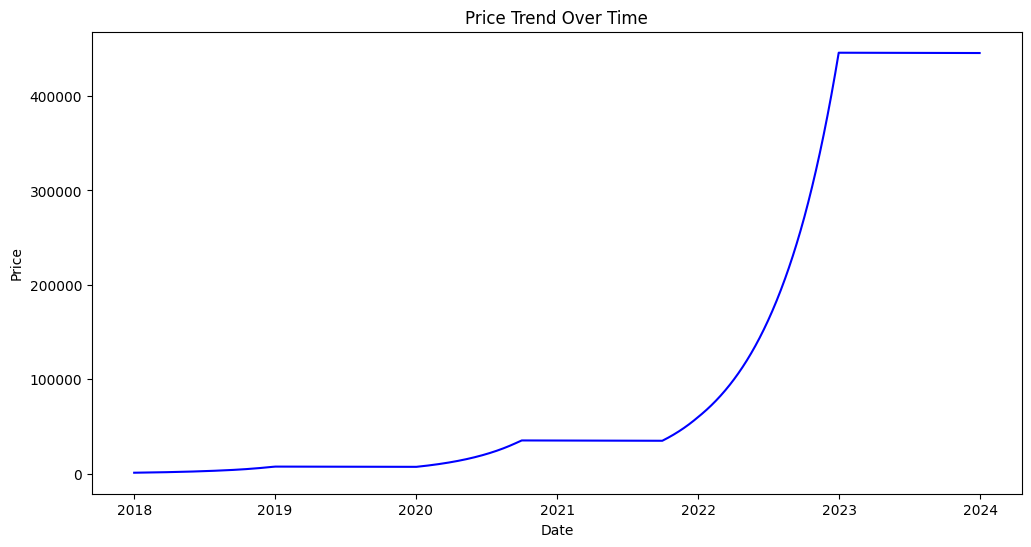

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], color='blue')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

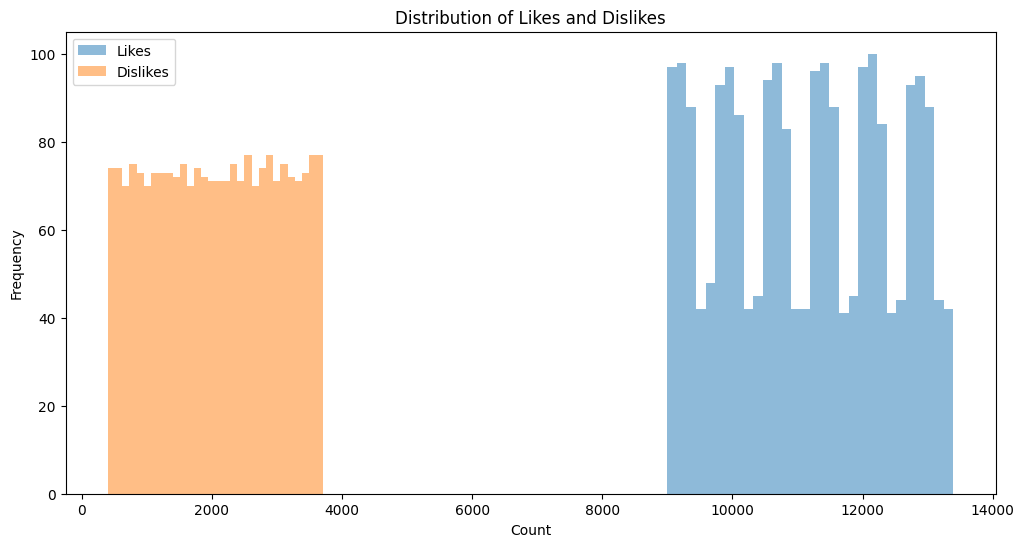

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df['likes'], bins=30, alpha=0.5, label='Likes')
plt.hist(df['dislikes'], bins=30, alpha=0.5, label='Dislikes')
plt.title('Distribution of Likes and Dislikes')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

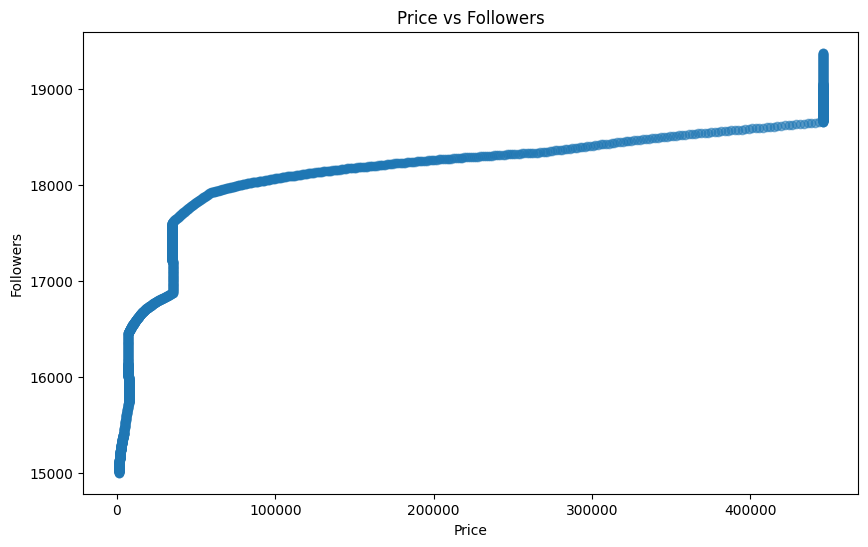

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['followers'], alpha=0.5)
plt.title('Price vs Followers')
plt.xlabel('Price')
plt.ylabel('Followers')
plt.show()

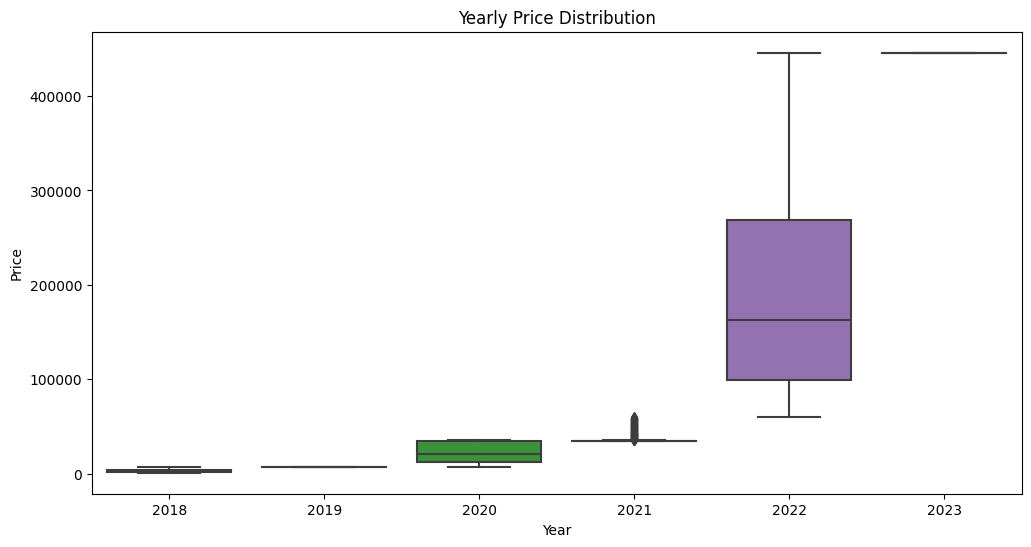

In [46]:
df['year'] = df['date'].dt.year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='price', data=df)
plt.title('Yearly Price Distribution')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [47]:
import statsmodels.tsa.seasonal

<ipython-input-48-dfba68669698>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = avg_price_monthly.pivot("month", "year", "price")


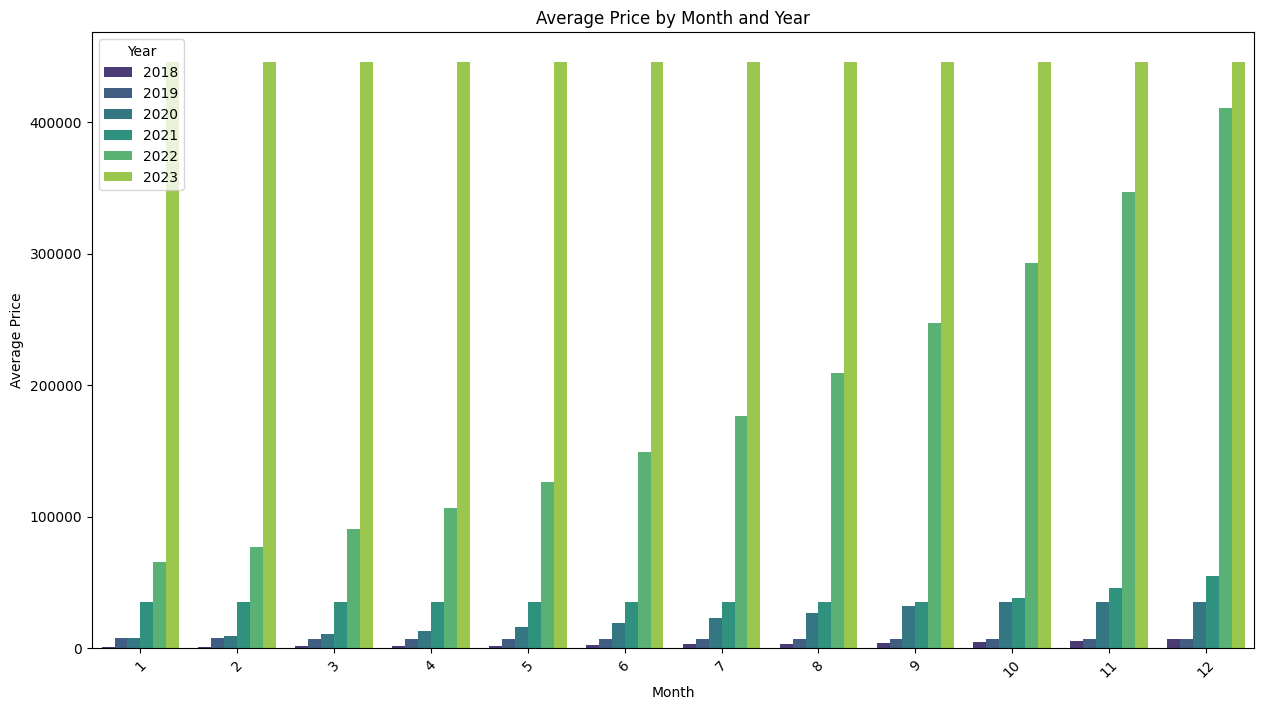

In [48]:
# Extract year and month from the date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month, then calculate the average price
avg_price_monthly = df.groupby(['year', 'month'])['price'].mean().reset_index()

# Pivot the data for easier plotting
pivot_table = avg_price_monthly.pivot("month", "year", "price")

# Plotting
plt.figure(figsize=(15, 8))
sns.barplot(x='month', y='price', hue='year', data=avg_price_monthly, palette='viridis')
plt.title("Average Price by Month and Year")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend(title='Year')
plt.show()

<ipython-input-49-53d24db53d0e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")


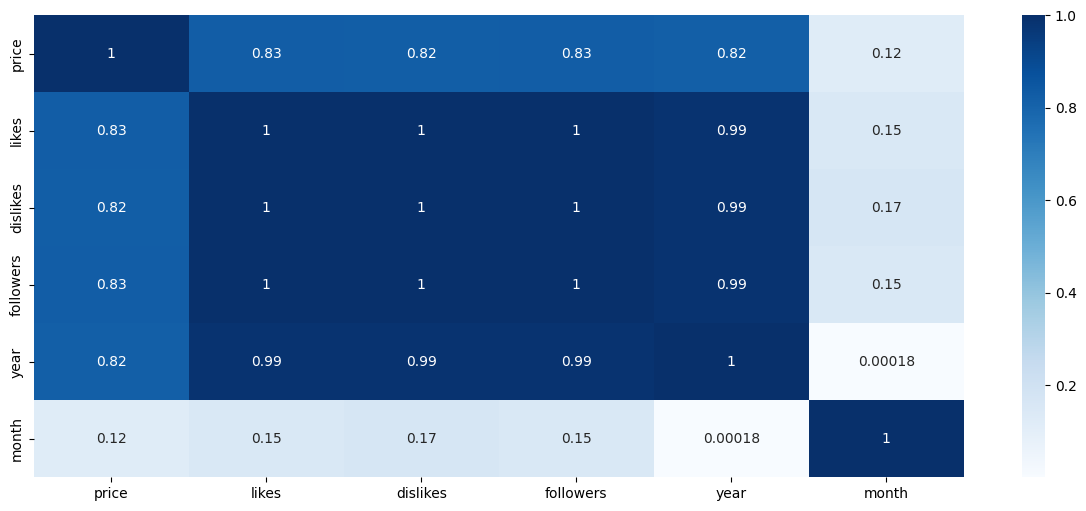

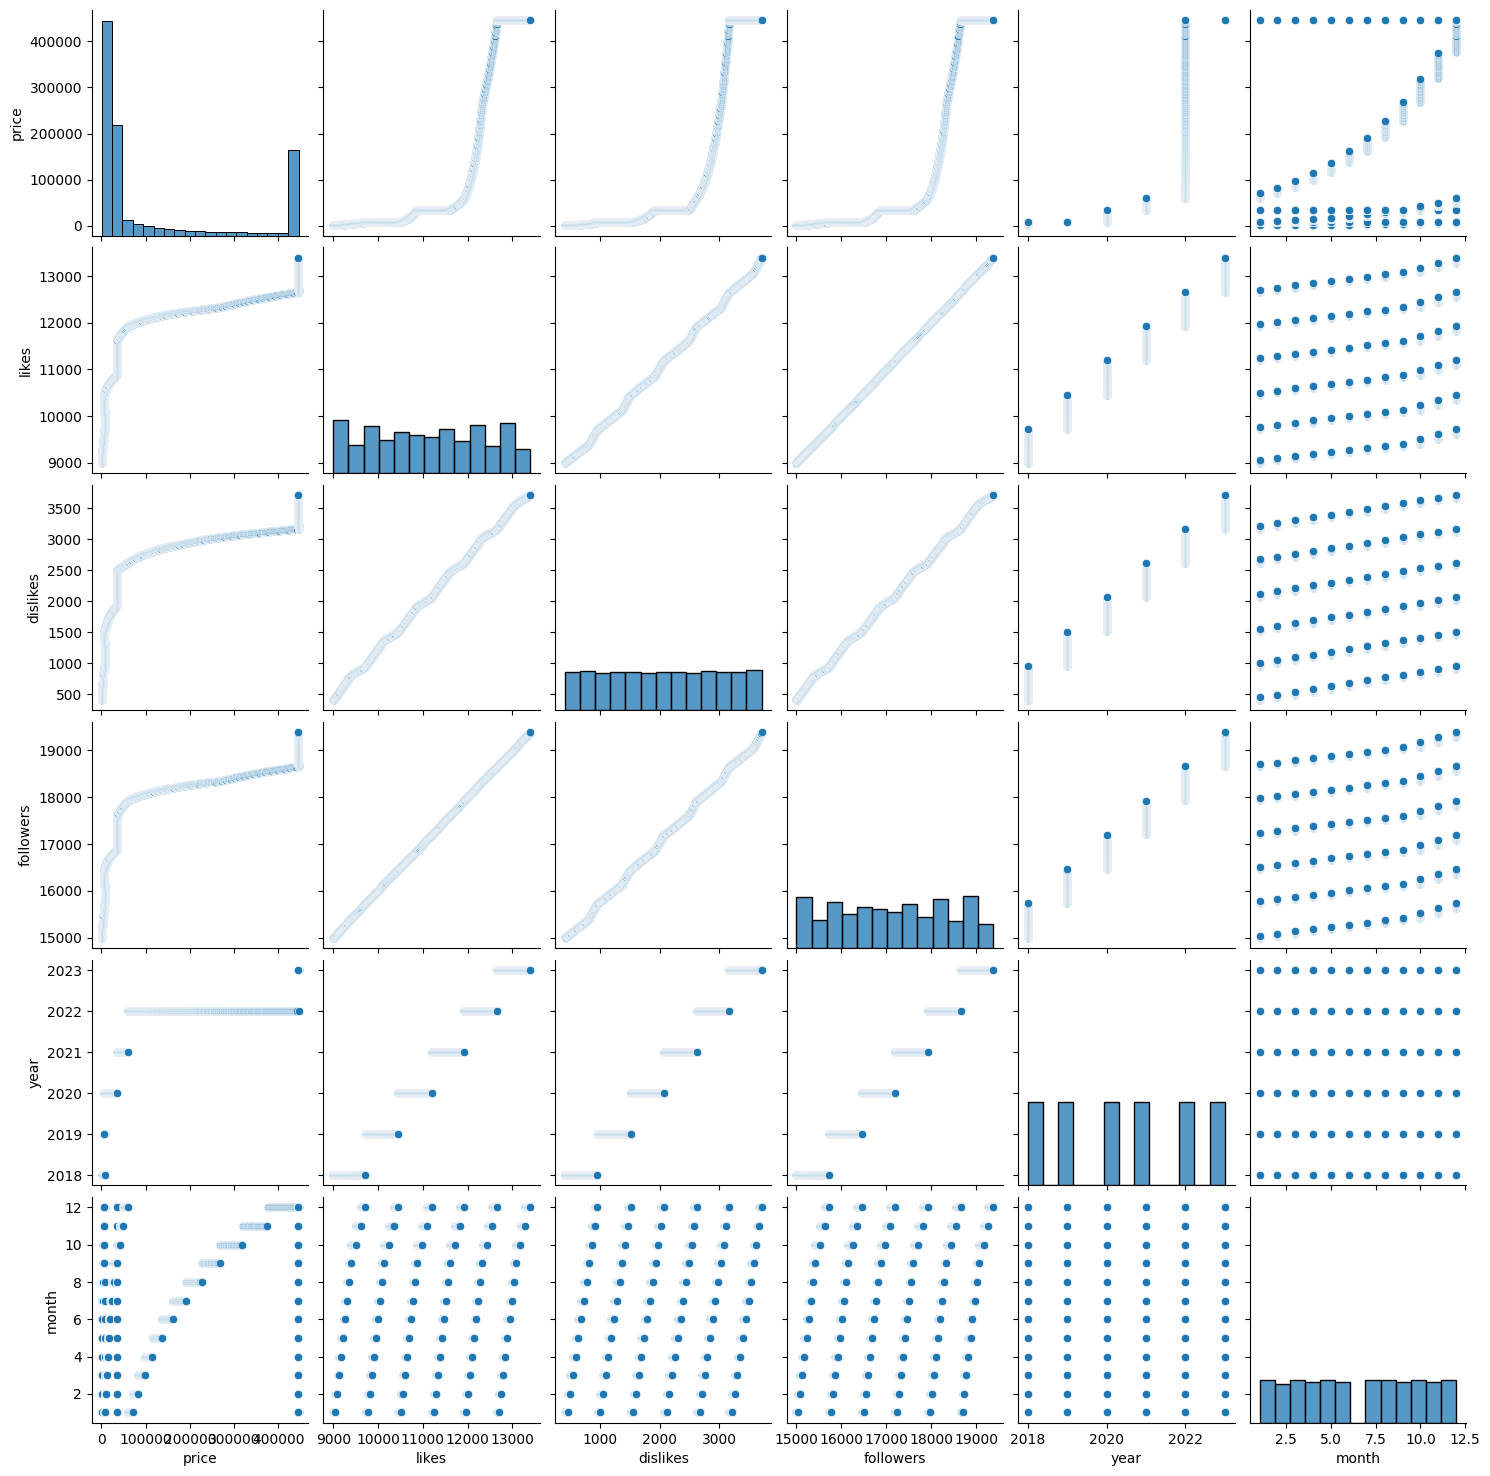

In [49]:
# Create a heatmap

plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")
sns.pairplot(df)

In [63]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.day

<ipython-input-63-8d099e97be82>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


In [64]:
# Create traning and testing datasets

x = df[['year','month','week','day','likes', 'dislikes', 'followers']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [65]:
# Identify the best model

regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),
}

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       2191 non-null   datetime64[ns]
 1   price      2191 non-null   float64       
 2   likes      2191 non-null   int64         
 3   dislikes   2191 non-null   int64         
 4   followers  2191 non-null   int64         
 5   year       2191 non-null   int64         
 6   month      2191 non-null   int64         
 7   week       2191 non-null   int64         
 8   day        2191 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 154.2 KB


In [67]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }

    df_models = pd.concat([df_models, pd.DataFrame.from_records([row])])

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* HuberRegressor


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_

* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.741e+12, tolerance: 4.242e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.063e+12, tolerance: 3.827e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.113e+12, tolerance: 3.854e

* OrthogonalMatchingPursuit


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.034e+12, tolerance: 3.751e+09
  model = cd_fast.enet_coordinate_descent(


In [68]:
# Order model results

df_models.head(20).sort_values(by='rmse',ascending=True)

,model,run_time,rmse
0,RandomForestRegressor,0.14,328
0,DecisionTreeRegressor,0.0,672
0,XGBRegressor,0.02,994
0,Lars,0.0,59637
0,Ridge,0.0,85301
0,ARDRegression,0.02,89379
0,BayesianRidge,0.0,89451
0,ElasticNet,0.0,92152
0,OrthogonalMatchingPursuit,0.0,92566
0,HuberRegressor,0.03,109703


In [69]:
regressor = RandomForestRegressor()
model = regressor.fit(x_train, y_train)
y_pred = model.predict(x_test)

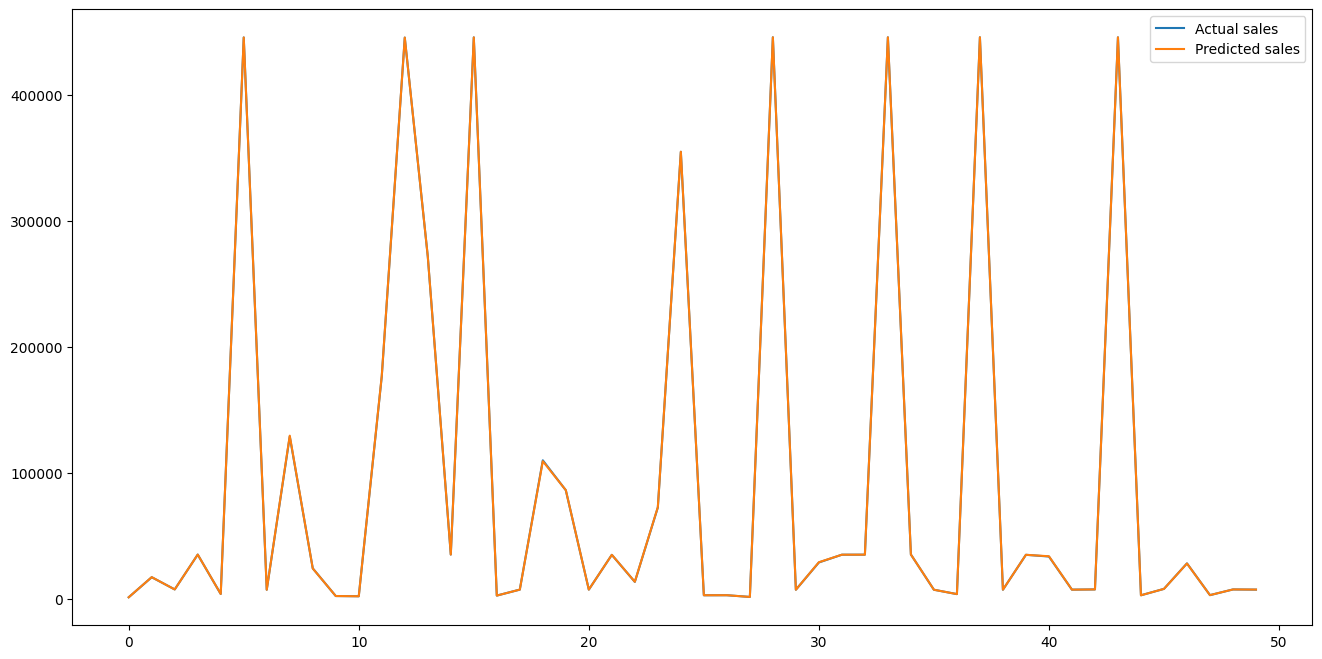

In [74]:

# Plot
test = pd.DataFrame({'Predicted price': y_pred, 'Actual price': y_test})
fig = plt.figure(figsize=(16, 8))
test = test.reset_index(drop=True)
plt.plot(test[:50])
plt.legend(['Actual sales', 'Predicted sales'])
plt.show()


1. The plot displays a very close match between the predicted sales (orange line) and the actual sales (blue line), indicating that the predictive model is performing well on this set of data points.

2. The predictive model seems to capture these variations accurately, as the peaks and valleys of the actual sales are closely mirrored by the predicted sales.

3. It is worth noting that both lines overlap almost completely in many areas, which could make it difficult to distinguish between them visually. This can be seen as a positive sign of the model's accuracy.

4. The consistency in the model’s predictions across different magnitudes of sales suggests that the model has learned the underlying trends and patterns effectively.

In [77]:
# Predict a new price amount

temp_data = {   'year' : [2024],
                'month' : [1],
                'week' : [1],
                'day' : [1],
                'likes': [13396],
                'dislikes':[3714],
                'followers':[19377]
        }

df_price_input = pd.DataFrame(temp_data, columns = ['year','month','week','day','likes', 'dislikes', 'followers'])

df_price_prediction_result = model.predict(df_price_input)

df_price_prediction_result

array([445620.3085])